# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt     # for creating plots
import pandas as pd                 # for handling and structuring data
import numpy as np                  # for generating random numbers and handling numerical operations
import requests                     # for API calls
import time                         # for adding delays to API calls - to prevent charges
from scipy.stats import linregress  # for calculating linear regression

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key  # for authenticating requests to the OpenWeather API

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy           # library 

import json
from pprint import pprint           # adding because I like pretty print!

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Defining the range of latitudes and longitudes
lat_range = (-90, 90)     # -90 (South Pole) to 90 (North Pole)
lng_range = (-180, 180)   # -180 (westernmost point) to 180 (easternmost point)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)   # generates 1500 random latitude values
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)   # generates 1500 random longtude values
lat_lngs = zip(lats, lngs)     # pairs each latitude with it's corresponding longitude - a tuple!

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list  -- eliminates duplicates
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 573


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"

city = "Minneapolis"

city_weather = requests.get(city_url).json() 

pprint(city_weather)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 44.98, 'lon': -93.2638},
 'dt': 1738454569,
 'id': 5037649,
 'main': {'feels_like': -8.66,
          'grnd_level': 981,
          'humidity': 72,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': -1.89,
          'temp_max': -0.55,
          'temp_min': -2.85},
 'name': 'Minneapolis',
 'sys': {'country': 'US',
         'id': 2012563,
         'sunrise': 1738416752,
         'sunset': 1738452044,
         'type': 2},
 'timezone': -21600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 140, 'speed': 7.72}}


In [22]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters to track the progress
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
                     #api key               &query = the city we're looking for
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() 

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lon = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lon": city_lon,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    
    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | west island
Processing Record 3 of Set 1 | bakanas
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | zelenogorsk
Processing Record 7 of Set 1 | ariquemes
Processing Record 8 of Set 1 | sant antoni de portmany
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | spanish wells
Processing Record 13 of Set 1 | college
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | holualoa
Processing Record 17 of Set 1 | taulaga
Processing Record 18 of Set 1 | san jose village
City not found. Skipping...
Processing Record 19 of Set 1 | lihue
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | dudinka
Processing Record 22 of 

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lon           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.6500,14.94,76,0,5.98,CL,1738453895
1,west island,-12.1568,96.8225,27.99,83,40,6.17,CC,1738454140
2,bakanas,44.8081,76.2772,-7.42,91,83,2.31,KZ,1738454141
3,adamstown,-25.0660,-130.1015,24.97,68,93,6.83,PN,1738454142
4,hermanus,-34.4187,19.2345,18.78,81,30,2.41,ZA,1738453881


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,14.94,76,0,5.98,CL,1738453895
1,west island,-12.1568,96.8225,27.99,83,40,6.17,CC,1738454140
2,bakanas,44.8081,76.2772,-7.42,91,83,2.31,KZ,1738454141
3,adamstown,-25.0660,-130.1015,24.97,68,93,6.83,PN,1738454142
4,hermanus,-34.4187,19.2345,18.78,81,30,2.41,ZA,1738453881


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

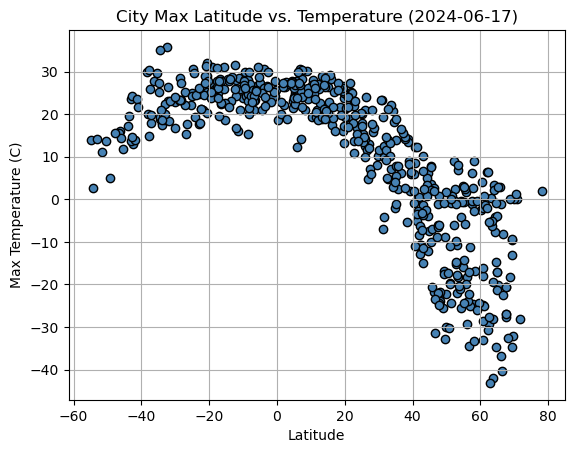

In [61]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = "o", color = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

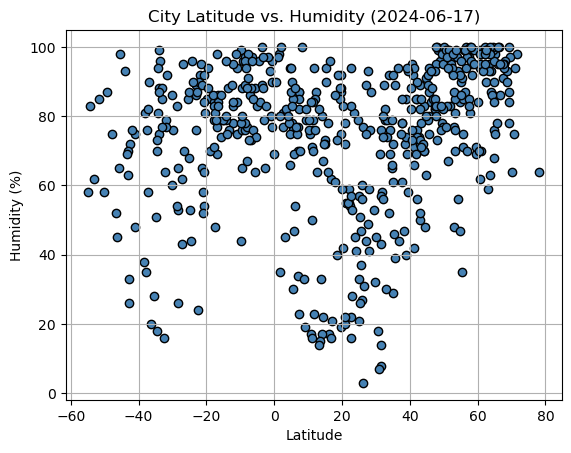

In [62]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o", color = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

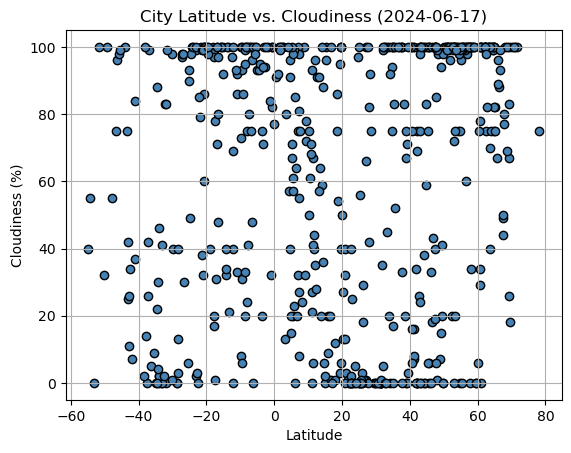

In [63]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o", color = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

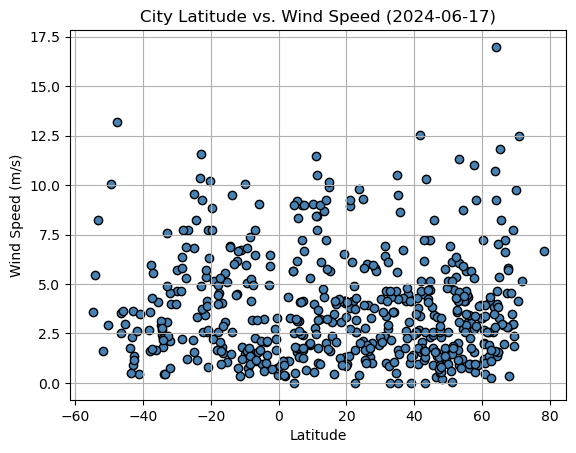

In [64]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o", color = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [70]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, x_label, y_label, title):

    # perform a linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # get regression values
    regression_values = slope * x_values + intercept

    # create the scatter plot
    plt.scatter(x_values, y_values, marker = "o", color = "steelblue")

    # label plot and annotate the line equation
    plt.plot(x_values, regression_values, color = "red")
  
    # print the equation in my graph (string)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq, (0, 0), fontsize = 15, color = "red")

    # set plot labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Show the plot
    plt.show() 

    # Return the r^2 value
    return rvalue**2 

In [71]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bakanas,44.8081,76.2772,-7.42,91,83,2.31,KZ,1738454141
5,zelenogorsk,56.1147,94.5861,-18.14,99,99,0.73,RU,1738454145
7,sant antoni de portmany,38.9807,1.3036,8.94,85,0,0.00,ES,1738454148
9,yellowknife,62.4560,-114.3525,-29.21,90,75,4.12,CA,1738453882
11,spanish wells,26.3230,-81.7957,24.02,3,18,3.94,US,1738454152


In [72]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,14.94,76,0,5.98,CL,1738453895
1,west island,-12.1568,96.8225,27.99,83,40,6.17,CC,1738454140
3,adamstown,-25.0660,-130.1015,24.97,68,93,6.83,PN,1738454142
4,hermanus,-34.4187,19.2345,18.78,81,30,2.41,ZA,1738453881
6,ariquemes,-9.9133,-63.0408,23.72,99,100,1.46,BR,1738454146


###  Temperature vs. Latitude Linear Regression Plot

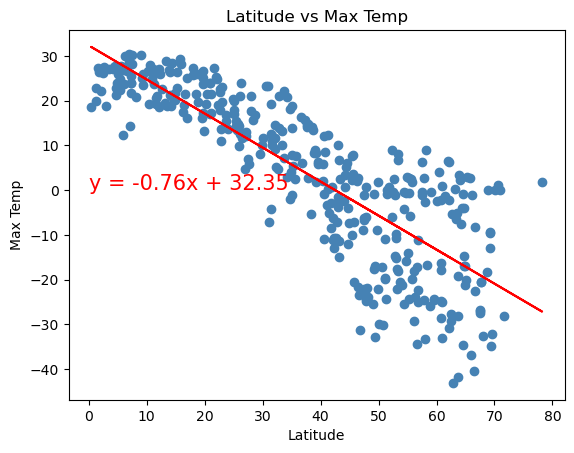

The r^2-value is: 0.6963950449556787


In [73]:
# Linear regression on Northern Hemisphere

# Call the function for linear regression plot
north_temp_lat = linear_regression_plot(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Max Temp"],  
    "Latitude", 
    "Max Temp", 
    "Latitude vs Max Temp")

plt.show()

print(f"The r^2-value is: {north_temp_lat}")


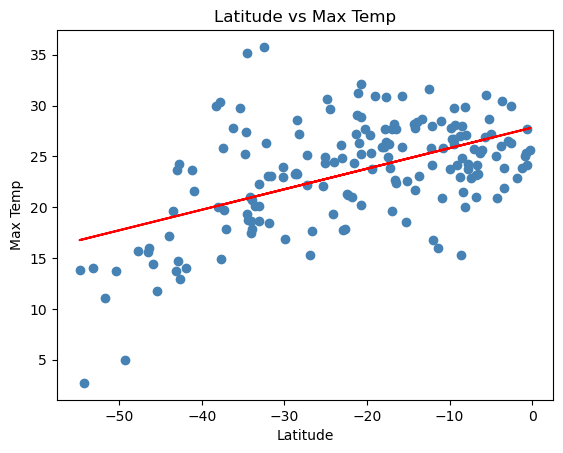

The r^2-value is: 0.2797831276238891


In [74]:
# Linear regression on Southern Hemisphere

# Call the function for linear regression plot
south_temp_lat = linear_regression_plot(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Max Temp"],  
    "Latitude", 
    "Max Temp", 
    "Latitude vs Max Temp")

plt.show()

print(f"The r^2-value is: {south_temp_lat}")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.007659599322853922


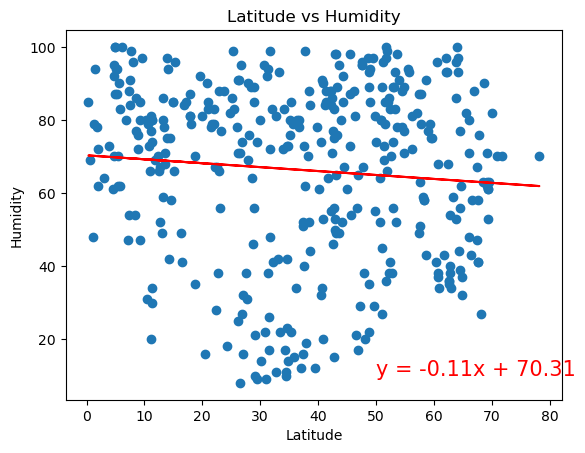

In [17]:
# Linear regression on Northern Hemisphere

The r^2-value is: 0.00014367159540169783


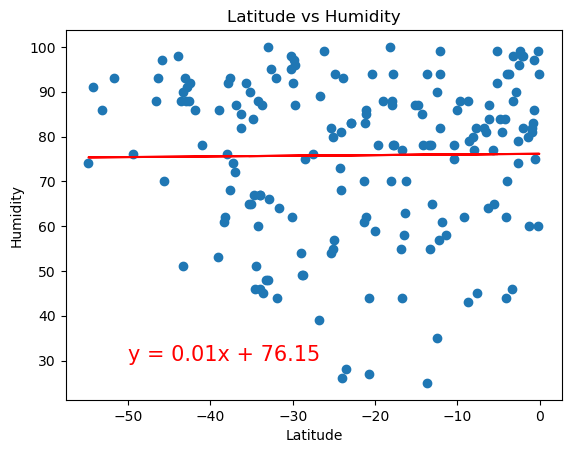

In [23]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.006456908379763574


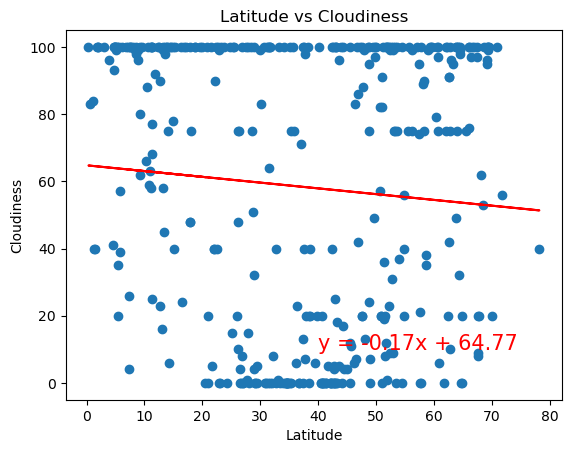

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.018616831531634456


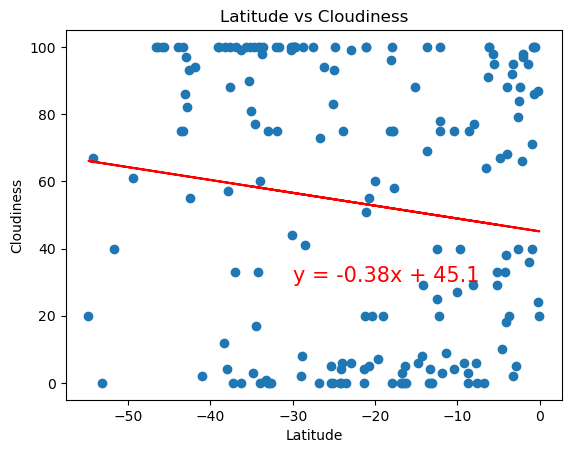

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0017236249523139959


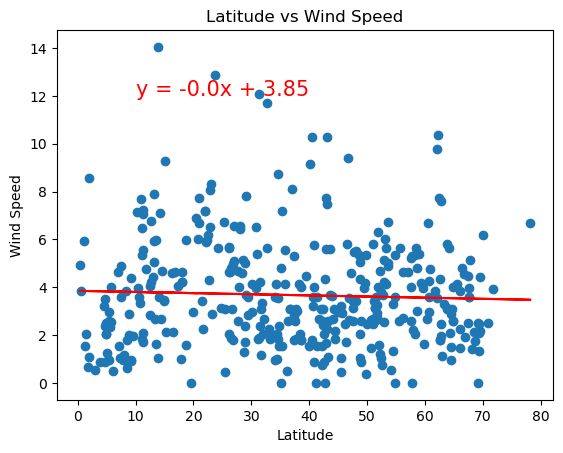

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.06495869418886388


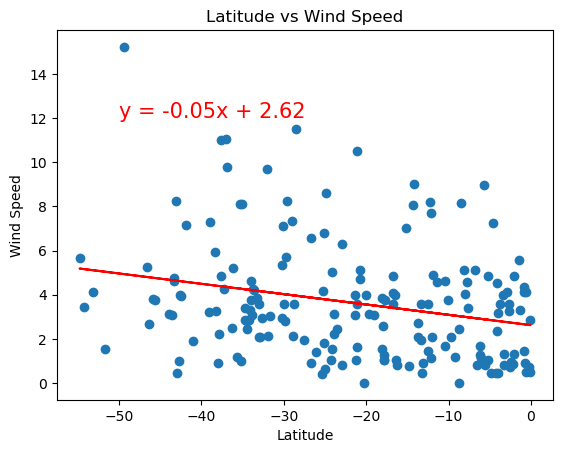

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE